<a href="https://colab.research.google.com/github/pikey-msc/PythonBasico/blob/master/Numpy_Insum_e_Indices_High_Performance_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Imports { display-mode: "form" }
from __future__ import print_function
from __future__ import division
from __future__ import absolute_import

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

try:
  tf.enable_eager_execution()
  print('Eager execution enabled')
except ValueError:
  print('Already running in Eager mode')

tfe = tf.contrib.eager
  

Already running in Eager mode


In [ ]:
import numpy as np

##Numpy Einsum

La función einsum superar las funciones de matriz conocidas en términos de velocidad y eficiencia de memoria, gracias a su poder expresivo y bucles inteligentes, sin embargo, puede llevar un poco de tiempo comprender la notación y aplicarla correctamente a un problema complicado.


La función einsum superar las funciones de matriz conocidas en términos de velocidad y eficiencia de memoria, gracias a su poder expresivo y bucles inteligentes, sin embargo, puede llevar un poco de tiempo comprender la notación y aplicarla correctamente a un problema complicado.

### Funcionamiento de einsum

La clave es elegir el etiquetado correcto para los ejes de las matrices de entradas y la matriz que queremos sacar.

La función nos permite hacer eso de dos maneras: usando una cadena de letras o usando listas de números enteros. Para simplificar, nos enfocaremos a las cadenas (esta parece ser la más utilizada de las dos opciones).

Un buen ejemplo para observar es la multiplicación de matrices, que implica multiplicar filas por columnas y luego sumar los productos. Para las matrices Ay B, se puede realizar la multiplicación de matrices np.einsum('$ij$, $jk$ -> $ik$', $A$, $B$).

Notación matematica: $C_{i,k}=\sum_{k}A_{ij}B_{jk}$

Esta cadena se interpreta como pensar que '$ij$, $jk$ -> $ik$' en dividir en dos a partir de la flecha "->". La parte de la izquierda etiqueta los ejes de las matrices de entrada, es decir, '$ij$' pertenecen a la matriz $A$ y '$jk$' pertenecen a la matriz $B$. La parte derecha de la cadena etiqueta los ejes de la matriz de salida única con las letras '$ik$'.

Se podría interpretar como:
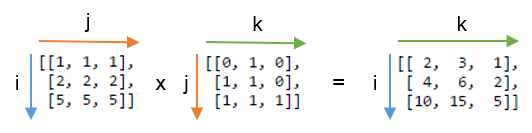

``numpy.einsum(subscripts, *operands, out=None, dtype=None, order='K', casting='safe', optimize=False)``

Evalúa el convenio de suma de Einstein, notación de Einstein o notación indexada a la convención utilizada para abreviar la escritura de sumatorios, en el que se suprime el símbolo de sumatorio representado con la letra griega sigma -

Usando el convenio de suma de Einstein, varias vectores multidimensionales, operaciones de arreglos de álgebra lineal puede ser representada de una manera simple.
En modo implícito einsumo calcula estos valores.

De modo explícito, einsum provee una flexibilidad más amplia para calcular otras operaciones con arreglos que puede no ser considerada una operación de suma de Einstein, por deshabilitar, o forzar la suma sobre índices específicos.


Parameteros\
``subscripts:str``\
Especifica los índices para la suma separados por una lista. Una suma clásica de Einstein se calcula a menos que se especifique el indicador `->` es incluído tanto como las etiquetas de manera precisa.

`operands:list of array_like`\
Se ingresan los arreglos para la operación.

`out: ndarray, optional`
Si se provee, el cálculo se hace en este arreglo.


`dtype:{data-type, None}, optional`\
Si se provee, forza al cálculo para usar los datos especificados. Se tiene que agregar  un parámetro de "casting" para la conversión.

`order: {‘C’, ‘F’, ‘A’, ‘K’}, optional`\
Controla el layout de la memoria de salida. ‘C’ significa que puede ser C contiguo. ‘F’ significa que puede ser Fortran contiguo, ‘A’ significa que todos los insumos debe de ser 'F'. ‘K’ significa que debe ser lo más cercano posible hacia el layout, incluyendo permutació arbitraria de ejes. El Default es ‘K’.

`casting{‘no’, ‘equiv’, ‘safe’, ‘same_kind’, ‘unsafe’}, optional`\
Controla qué tipo de conversión debe ocurrir. No se recomienda cambiarlo a 'unsafe'.

‘no’ significa que las variables no deben ser convertidas a otro formato.

‘equiv’ significa que solo cambios del byte-order están permitidas.

‘safe’ significa que solo las conversiones que pueden preservar valores están permitidas.

‘same_kind’ significa que solo conversiones safe casts or casts de untipo como float64, float32 son permitidas.

‘unsafe’ significa que cualquier conversión de datos puede ser realizada. 

El Default es ‘safe’.

`optimize:{False, True, ‘greedy’, ‘optimal’}, optional`\
Controla si la intermediación en la optimización puede ocurrir, ninguna optimización ocurrirá si es False y True utilizará el algoritmo 'greedy'.
También acepta una lista de contracción explícita de la función np.einsum_path. El Default es False.

## Ejemplo


### Operaciones de matrices

In [ ]:
a = np.arange(25).reshape(5,5)
b = np.arange(5)
c = np.arange(6).reshape(2,3)
print(a)
b


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]


array([0, 1, 2, 3, 4])

### Traza de una matriz

In [ ]:
print(np.einsum('ii', a))

print(np.einsum(a, [0,0]))

print(np.trace(a))


60
60
60


### Extrae la diagonal

In [ ]:
print(np.einsum('ii->i', a))

print(np.einsum(a, [0,0], [0]))

print(np.diag(a))


[ 0  6 12 18 24]
[ 0  6 12 18 24]
[ 0  6 12 18 24]


### Suma sobre un eje

In [ ]:
print(np.einsum('ij->i', a))

print(np.einsum(a, [0,1], [0]))

np.sum(a, axis=1)


[ 10  35  60  85 110]
[ 10  35  60  85 110]


array([ 10,  35,  60,  85, 110])

### Ellipsis
Para dimensiones grandes sumando un solo eje se puede hacer con ellipsis:


In [ ]:
print(np.einsum('...j->...', a))


print(np.einsum(a, [Ellipsis,1], [Ellipsis]))


[ 10  35  60  85 110]
[ 10  35  60  85 110]


### Calcula una matriz transpuesta o reordena cualquier eje:

In [ ]:

print(np.einsum('ji', c))

print(np.einsum('ij->ji', c))

print(np.einsum(c, [1,0]))

np.transpose(c)


[[0 3]
 [1 4]
 [2 5]]
[[0 3]
 [1 4]
 [2 5]]
[[0 3]
 [1 4]
 [2 5]]


array([[0, 3],
       [1, 4],
       [2, 5]])

### Producto interno de vectores:


In [ ]:

print(np.einsum('i,i', b, b))

print(np.einsum(b, [0], b, [0]))

np.inner(b,b)


30
30


30

### Multiplicación de matrices:


In [ ]:

print(np.einsum('ij,j', a, b))

print(np.einsum(a, [0,1], b, [1]))

print(np.dot(a, b))

np.einsum('...j,j', a, b)


[ 30  80 130 180 230]
[ 30  80 130 180 230]
[ 30  80 130 180 230]


array([ 30,  80, 130, 180, 230])

### Mulplicación con escalares:

In [ ]:

print(np.einsum('..., ...', 3, c))

print(np.einsum(',ij', 3, c))
print(np.einsum(3, [Ellipsis], c, [Ellipsis]))
np.multiply(3, c)


[[ 0  3  6]
 [ 9 12 15]]
[[ 0  3  6]
 [ 9 12 15]]
[[ 0  3  6]
 [ 9 12 15]]


array([[ 0,  3,  6],
       [ 9, 12, 15]])

### Producto externo: (outer product)


In [ ]:

print(np.einsum('i,j', np.arange(2)+1, b))

print(np.einsum(np.arange(2)+1, [0], b, [1]))
np.outer(np.arange(2)+1, b)


[[0 1 2 3 4]
 [0 2 4 6 8]]
[[0 1 2 3 4]
 [0 2 4 6 8]]


array([[0, 1, 2, 3, 4],
       [0, 2, 4, 6, 8]])

### Contracciones de tensores:

In [ ]:
a = np.arange(60.).reshape(3,4,5)
b = np.arange(24.).reshape(4,3,2)
print(np.einsum('ijk,jil->kl', a, b))
print(np.einsum(a, [0,1,2], b, [1,0,3], [2,3]))
np.tensordot(a,b, axes=([1,0],[0,1]))


### Arreglos reescribibles



In [ ]:

a = np.zeros((3, 3))
np.einsum('ii->i', a)[:] = 1
a


Ejemplo de uso de ellipsis:

In [ ]:
a = np.arange(6).reshape((3,2))
b = np.arange(12).reshape((4,3))
print(np.einsum('ki,jk->ij', a, b))
print(np.einsum('ki,...k->i...', a, b))
np.einsum('k...,jk', a, b)


[[10 28 46 64]
 [13 40 67 94]]
[[10 28 46 64]
 [13 40 67 94]]


array([[10, 28, 46, 64],
       [13, 40, 67, 94]])

### Operaciones de arreglos en cadena. 
Para contracciones más complicadas, se puede mejorar la velocidad usando la opción 'greedy' u 'optimal'. 
Las mejoras pueden ser significantes con arreglos muy grandes:


In [ ]:
a = np.ones(64).reshape(2,4,8)
print(a)
for iteration in range(500):
    _ = np.einsum('ijk,ilm,njm,nlk,abc->',a,a,a,a,a)

[[[1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1. 1. 1. 1.]]]


In [ ]:

%%timeit 
for iteration in range(500):
  hs = np.einsum('ijk,ilm,njm,nlk,abc->',a,a,a,a,a, optimize='optimal')
print(hs)

262144.0
262144.0
262144.0
262144.0
1 loop, best of 3: 491 ms per loop


In [ ]:
%%timeit 
for iteration in range(500):
    _ = np.einsum('ijk,ilm,njm,nlk,abc->',a,a,a,a,a, optimize='greedy')

1 loop, best of 3: 179 ms per loop


In [ ]:
%%timeit 
path = np.einsum_path('ijk,ilm,njm,nlk,abc->',a,a,a,a,a, optimize='optimal')[0]
for iteration in range(500):
    _ = np.einsum('ijk,ilm,njm,nlk,abc->',a,a,a,a,a, optimize=path)

10 loops, best of 3: 129 ms per loop


## Ejemplo con cálculos en dos matrices
Matrices

In [ ]:
# Definimos una matriz A
A = np.array(
  [[1.0, 3.0],
   [2.0, 1.0],
   [4.0, 2.0]]
)

# Definimos una matriz B
B = np.array(
  [[6.0, 2.0, 1.0],
   [3.0, 4.0, 5.0]]
)

# Definimos un vector X
x = np.array([3.0, 2.0])

print('A.shape es:', A.shape, 'B.shape es:', B.shape, 'x.shape es:', x.shape)
A

### Multiplicación de matriz con vector

Notemos la diferencia entre las distntas formas de hacerlo.

In [ ]:
# Usando numpy dot
y = A.dot(x)

print('Usando dot:\t y =', y, '\t y.shape =', y.shape)

# Usando einsum
y = np.einsum('ij, j', A, x)

print('Usando einsum:\t y =', y, '\t y.shape =', y.shape)

# Version manual 1:
y = np.array([
    A[0,0] * x[0] + A[0,1] * x[1],
    A[1,0] * x[0] + A[1,1] * x[1],
    A[2,0] * x[0] + A[2,1] * x[1],
    ])

print('Manual 1:\t y =', y, '\t y.shape =', y.shape)

# Version manual 2: 
# Matrix-vector Una multiplicacion puede ser pensado como  una combinacion lineal de columnas de una matriz.
y = x[0] * A[:,0]  +  x[1] * A[:, 1]

print('Manual 2:\t y =', y, '\t y.shape =', y.shape)

## Multiplicación de matriz con matriz

In [ ]:
# Usando numpy dot
C = A.dot(B)
print('Usando DOT: C= \n\n', C, '\n\nC.shape =', C.shape)

# Usando einsum
C = np.einsum('ik, kj', A, B)
print('\n\n Usando einsum: C= \n\n', C, '\n\nC.shape =', C.shape)

# Nota, acerca de la notacion einsum anterior es equivalente a la siguiente
C = np.einsum('ik, kj -> ij', A, B)

# Observamos que la multiplicación de matrices no es conmutativa.

C = B.dot(A)
print('C: \n', C)
print()
print('C.shape:', C.shape)

Observemos en el siguiente codigo como la multiplicación de matrices no es conmutativa.

In [ ]:
C = np.einsum('ik, kj', B, A)

print('C: \n', C)
print()
print('C.shape:', C.shape)

## Ejercicio
Algunos ejemplos de como usar esta notación para proximos ejercicios son:

Devuelve una vista de A: ('$ij$', $A$)

Suma los valores de A: ('$ij$->', $A$)

Multiplicación de matrices A y B:
('$ij$,$jk$ -> $kj$', A, B)

Producto interno de A y B: ('$ij$, $kj$ -> $ik$', A, B)

## Ejemplo Red Neuronal

Calcularemos la salida de una red neuronal de 1 capa y los gradientes respecto a sus parametros. Definimos un ejemplo de un vector de entrada y parametros, pero mantenemos los calculos anteriores. Puedes cambiar los valores y formas de $x$, $A$ y $b$ que estan a continuación y ejecutar el resto del codigo para calcular la salida y gradientes para tú propio ejemplo.

In [ ]:
x = np.array([[-1.], [0.1], [2.1]])  # X esta conformado por (3, 1)
A = np.array([              # A esta conformado por (2, 3)
    [ 1.1, -2.5,  0.3],
    [-2.1,  0.2, -1.1]
])  
b = np.array([[-1.0], [2.0]])      # b esta conformado por (2,1)

Calculo de salida de la red neuronal  
$$f=\tanh(Ax+b)$$

In [ ]:
M, N = A.shape
z = np.einsum('ik, kj', A, x) + b
f = np.tanh(z)

print('f =', f)